# Monopolistic Screening in Collaborative Machine Learning
## Experiment: Two-type Case

In [1]:
# import the relevant packages
from ContractSol_SGB_noSimp import *
from ContractVisualizer_SGB import *
from Generalization_Bounds_Setup import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LinearLocator
from tqdm import tqdm

In [2]:
# Define the NRange, pRange and c used for the experiment

NRange = np.arange(2, 101, 2)
pRange = np.vstack([np.linspace(0.01,0.99,30), 1-np.linspace(0,1,30)]).transpose()
c = np.array([2, 1])*0.01

In [3]:
# Create the variables to be used to store the experiment results

mesh = np.empty((len(NRange),len(pRange),len(c)*2))
converge = np.empty((len(NRange),len(pRange),1), dtype=object)
reserv_u = np.empty((len(NRange),len(pRange),len(c)))
reserv_m = np.empty((len(NRange),len(pRange),len(c)))
utility = np.empty((len(NRange),len(pRange),len(c)))
t_bar = np.empty((len(NRange),len(pRange), len(c)))
expected_val = np.empty((len(NRange),len(pRange)))

completeInfo_mesh = np.empty((len(NRange),len(pRange),len(c)*2))
completeInfo_converge = np.empty((len(NRange),len(pRange),1), dtype=object)
completeInfo_reserv_u = np.empty((len(NRange),len(pRange),len(c)))
completeInfo_utility = np.empty((len(NRange),len(pRange),len(c)))
completeInfo_val = np.empty((len(NRange),len(pRange)))

### Optimal Contract under Incomplete Information

In [4]:
for i in tqdm(range(len(NRange)), desc="NRange Progress"):
    N = NRange[i]
    for j in range(len(pRange)):
        p = pRange[j]
        sol = ContractSol_SGB(N, p, c, k, (a, a_der, a_hess), (v, v_der,v_hess))
        mesh[i,j,:] = sol['mt']
        converge[i,j,:] = sol['success']
        reserv_u[i,j,:], reserv_m[i,j,:] = sol['reserv_u'], sol['reserv_m']
        utility[i,j,:] = sol['utility']
        t_bar[i,j,:] = sol['t_bar']
        expected_val[i,j] = sol['E[v(a_max)]']

NRange Progress: 100%|██████████| 50/50 [02:42<00:00,  3.24s/it]


In [5]:
# Check the reservation levels without the collaborative scheme
print('Reservation contribution:', reserv_m[0,0,:])
print('Reservation value:', v(a(reserv_m[0,0,:])))

Reservation contribution: [ 715.55769974 1148.502895  ]
Reservation value: [69.56704594 75.64584081]


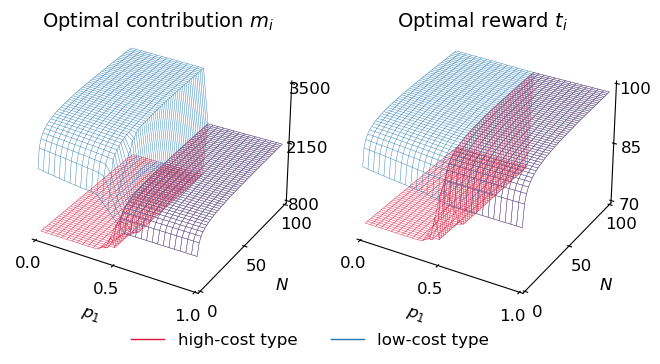

In [6]:
# Visualize the results

Visual3D(pRange, NRange, mesh, save = False, filename = None)

### Optimal Contract under Complete Information

In [7]:
for i in tqdm(range(len(NRange)), desc="NRange Progress"):
    N = NRange[i]
    for j in range(len(pRange)):
        p = pRange[j]
        completeInfo_sol, _ = ContractSol_CompleteInfo(N, p, c,k, a, a_der, v, v_der)
        completeInfo_mesh[i,j,:] = completeInfo_sol['mt']
        completeInfo_converge[i,j,:] = completeInfo_sol['success']
        completeInfo_reserv_u[i,j,:] = completeInfo_sol['reserv_u']
        completeInfo_utility[i,j,:] = completeInfo_sol['utility']
        completeInfo_val[i,j] = completeInfo_sol['t_cap']

NRange Progress: 100%|██████████| 50/50 [10:46<00:00, 12.94s/it]


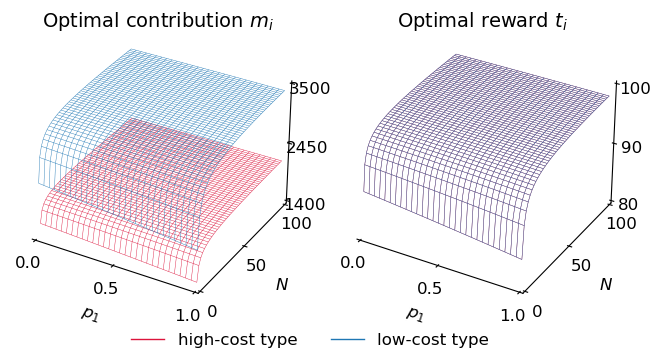

In [8]:
# Visualize the results

Visual3D(pRange, NRange, completeInfo_mesh, save = False, filename = None)

### Welfare Analysis

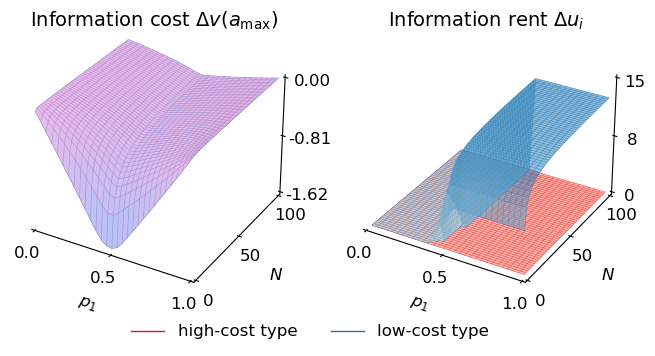

In [9]:
# Visualize the results

WelfareAnalysis(pRange, NRange, (utility-completeInfo_utility, expected_val[:,:]-completeInfo_mesh[:,:,-1]),  save = False, filename = None)